# Alpine Ibex ABM (v2) — Demo Notebook

Gentler parameters for more balanced outcomes.

In [1]:
# Setup project path (EDIT THIS to your real path on Windows/Mac/Linux)
import os, sys
project_root = r"D:\EdgeDownload\CITS4403\alpine_ibex_project_modular_v2"  # <-- change this
os.chdir(project_root)
sys.path.insert(0, project_root)
print('Working dir:', os.getcwd())

Working dir: D:\EdgeDownload\CITS4403\alpine_ibex_project_modular_v2


In [2]:
# Imports
from src.environment import Environment
from src.experiments import run_scenario
from utils.visualization import plot_heatmap, plot_salt_visits
import os

In [3]:
# Build environment & data
env = Environment(project_root, n=100, n_salt=15, seed=42)
terrain, salt_points = env.terrain, env.salt_points
print('Terrain shape:', terrain.shape, 'Salt points:', len(salt_points))

Terrain shape: (100, 100) Salt points: 15


In [4]:
# Run scenarios with v2 parameters (n_agents=60, time_steps=200)
df_base  = run_scenario(project_root, terrain, salt_points, 'baseline', 1.0, 1.0,  n_agents=60, time_steps=200)
df_low   = run_scenario(project_root, terrain, salt_points, 'low_salt', 0.5, 1.0, n_agents=60, time_steps=200)
df_steep = run_scenario(project_root, terrain, salt_points, 'steeper', 1.0, 1.2, n_agents=60, time_steps=200)


Running scenario: baseline
Step 0: 52 ibex alive.
Step 20: 6 ibex alive.
Step 40: 0 ibex alive.
Step 60: 0 ibex alive.
Step 80: 0 ibex alive.
Step 100: 0 ibex alive.
Step 120: 0 ibex alive.
Step 140: 0 ibex alive.
Step 160: 0 ibex alive.
Step 180: 0 ibex alive.
Saved baseline results to D:\EdgeDownload\CITS4403\alpine_ibex_project_modular_v2\data/results_baseline.csv

Running scenario: low_salt
Step 0: 54 ibex alive.
Step 20: 2 ibex alive.
Step 40: 0 ibex alive.
Step 60: 0 ibex alive.
Step 80: 0 ibex alive.
Step 100: 0 ibex alive.
Step 120: 0 ibex alive.
Step 140: 0 ibex alive.
Step 160: 0 ibex alive.
Step 180: 0 ibex alive.
Saved low_salt results to D:\EdgeDownload\CITS4403\alpine_ibex_project_modular_v2\data/results_low_salt.csv

Running scenario: steeper
Step 0: 45 ibex alive.
Step 20: 2 ibex alive.
Step 40: 0 ibex alive.
Step 60: 0 ibex alive.
Step 80: 0 ibex alive.
Step 100: 0 ibex alive.
Step 120: 0 ibex alive.
Step 140: 0 ibex alive.
Step 160: 0 ibex alive.
Step 180: 0 ibex ali

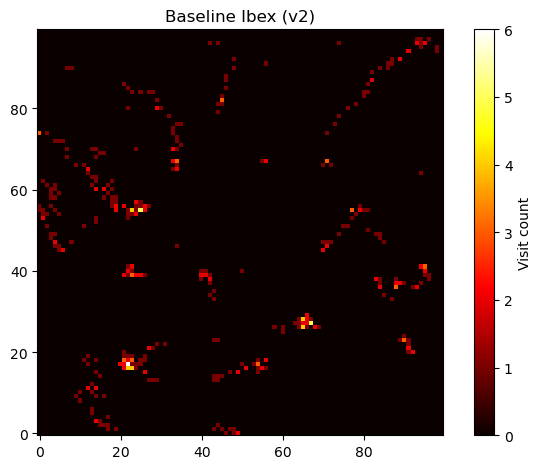

Saved: D:\EdgeDownload\CITS4403\alpine_ibex_project_modular_v2\figures\heatmap_baseline.png


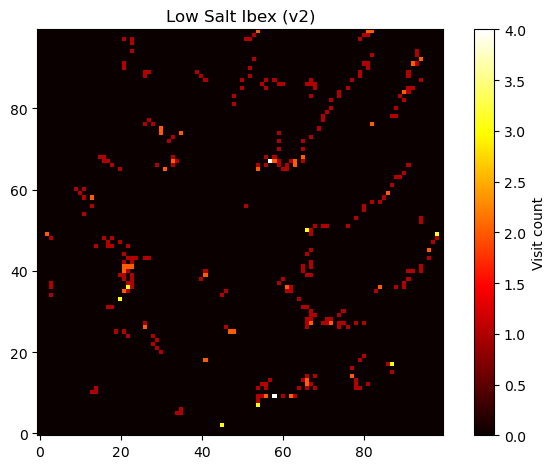

Saved: D:\EdgeDownload\CITS4403\alpine_ibex_project_modular_v2\figures\heatmap_low_salt.png


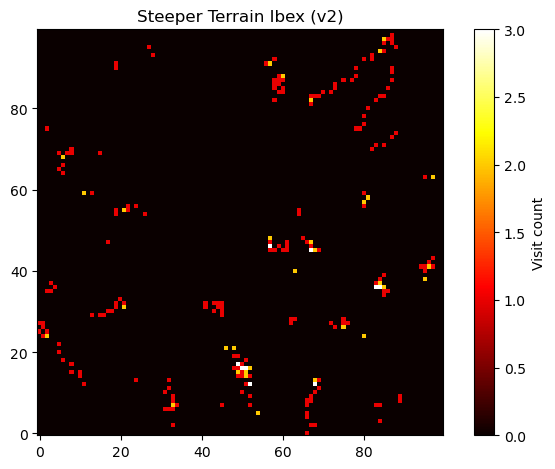

Saved: D:\EdgeDownload\CITS4403\alpine_ibex_project_modular_v2\figures\heatmap_steeper.png


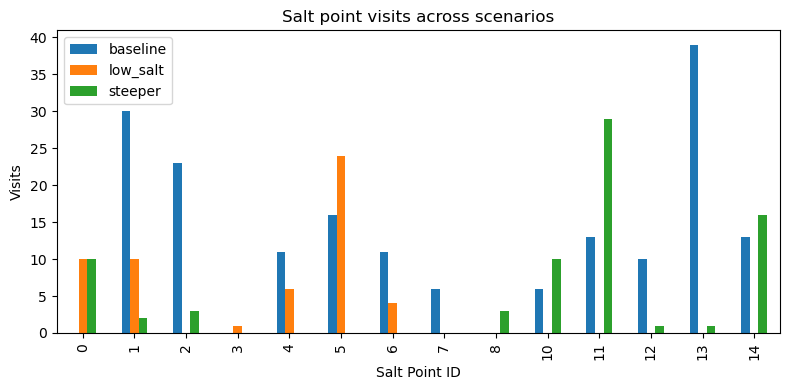

Saved D:\EdgeDownload\CITS4403\alpine_ibex_project_modular_v2\figures\salt_visits_comparison.png


In [5]:
# Visualize
fig_dir = os.path.join(project_root, 'figures')
plot_heatmap(df_base,  terrain, 'Baseline Ibex (v2)', fig_dir, 'heatmap_baseline.png')
plot_heatmap(df_low,   terrain, 'Low Salt Ibex (v2)', fig_dir, 'heatmap_low_salt.png')
plot_heatmap(df_steep, terrain, 'Steeper Terrain Ibex (v2)', fig_dir, 'heatmap_steeper.png')
plot_salt_visits({'baseline': df_base, 'low_salt': df_low, 'steeper': df_steep}, fig_dir)

**Tip:** If you still see early die-off, reduce `slope_modifier` or increase `n_salt`.